In [1]:
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
import sqlalchemy as alch
import numpy as np

In [8]:
# Set up emngines and connections
engine = alch.create_engine('sqlite:///jobs_preprocessed.db', echo=False)
engine_2 = alch.create_engine('sqlite:///dbs/jobs_LDA_20_clustered.db', echo=False)

In [9]:
con1 = engine.connect()
con2 = engine_2.connect()

In [10]:
# verify row count in both
result = con1.execute("SELECT COUNT(*) FROM jobs")
for row in result:
    count = row[0]
print(count)

3279172


In [11]:
result = con2.execute("SELECT COUNT(*) FROM jobs")
for row in result:
    count = row[0]
print(count)

3279172


In [12]:
%%time
topic_counts = [0]*20
# create a topic counter from the second connection
result = con2.execute("SELECT jobTopic FROM jobs")
for row in result:
    topic_counts[row[0]]+=1

Wall time: 6.03 s


In [13]:
# display the number of ads in each topic
print(topic_counts)

[217977, 230664, 28606, 316012, 174524, 96652, 155253, 201480, 115066, 104636, 263897, 260366, 206066, 170115, 160766, 87347, 94814, 181978, 81247, 131706]


In [14]:
%%time
# load all jobid/topic pairs
i=0
pairs = [None]*count
result = con2.execute("SELECT * FROM jobs")
for row in result:
    pairs[i] = [row[0], row[1]]
    i+=1

Wall time: 8.94 s


In [15]:
print(pairs[1578])

[37001578, 19]


In [16]:
def generate_cloud(topic_id):
    # create a wordcloud for a desired topic
    ad_count = topic_counts[topic_id]
    ads = [None]*ad_count

    i = 0
    j = 0

    result = con1.execute("SELECT jobid, jobDescription FROM jobs")
    for row in result:
        if topic_id == pairs[i][1]:
            ads[j] = row[1]
            j+=1
        i+=1
    ads = ' '.join(ads)
    stopwords = set(STOPWORDS)
    # extend the stopwords
    new_stopwords = ['use', 'work', 'role', 'exciting','like', 'candidate',
                   'skill','experience','join','team','business','career','hourly','part','time','hourly','hour','pay','day']
    for word in new_stopwords:
        stopwords.add(word)
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords,
                    max_words = 100,
                    min_font_size = 10, color_func=lambda *args, **kwargs: (0,0,0)).generate(ads) 
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 


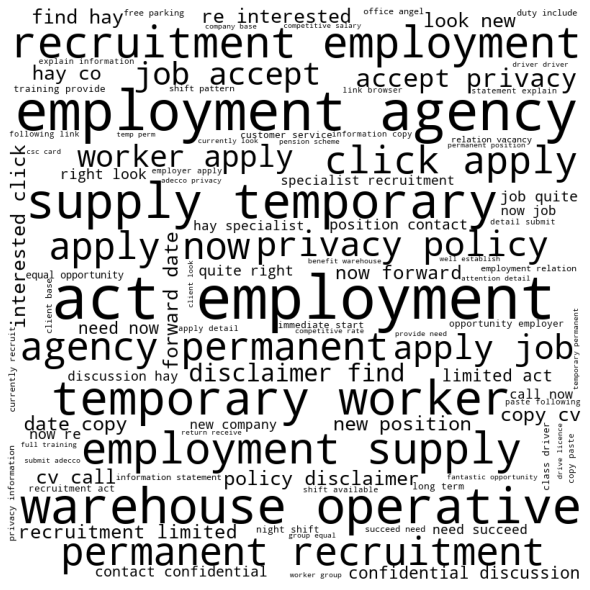

In [17]:
generate_cloud(0)

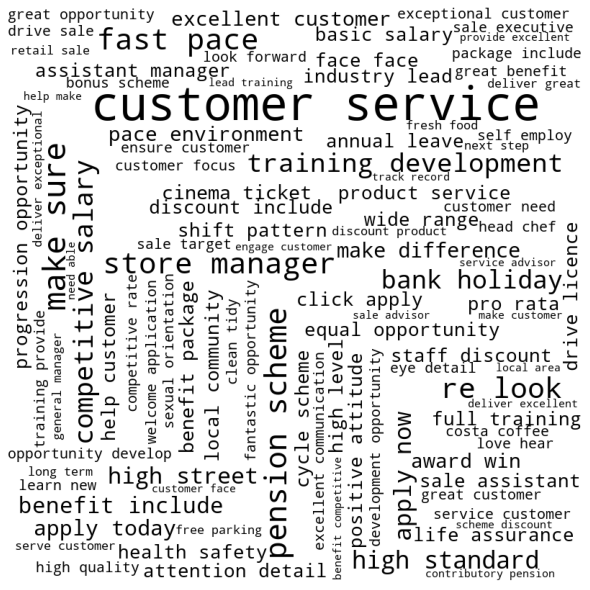

In [18]:
generate_cloud(1)

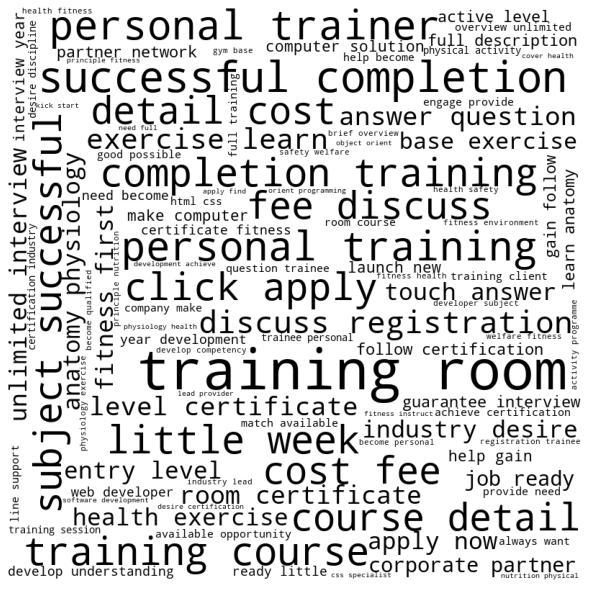

In [19]:
generate_cloud(2)

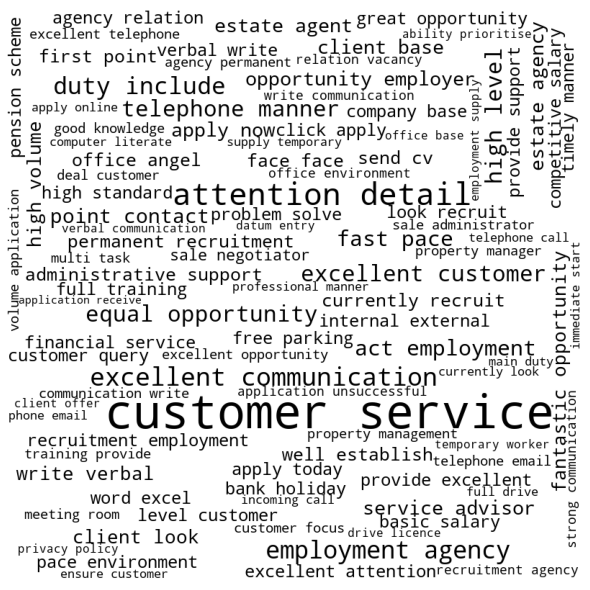

In [20]:
generate_cloud(3)

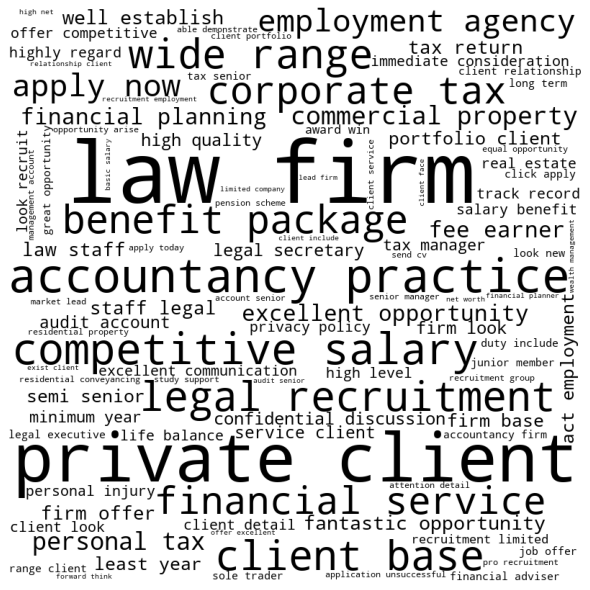

In [21]:
generate_cloud(4)

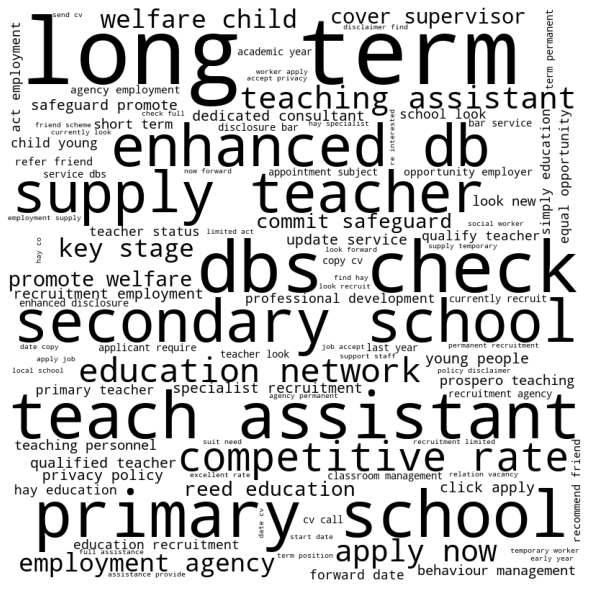

In [22]:
generate_cloud(5)

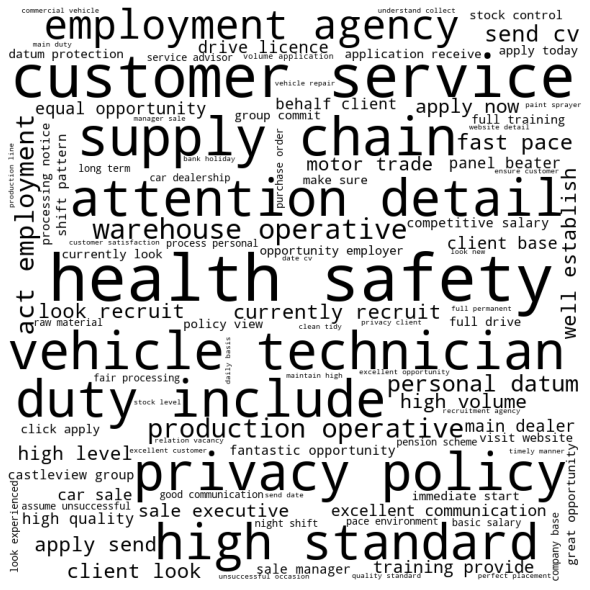

In [23]:
generate_cloud(6)

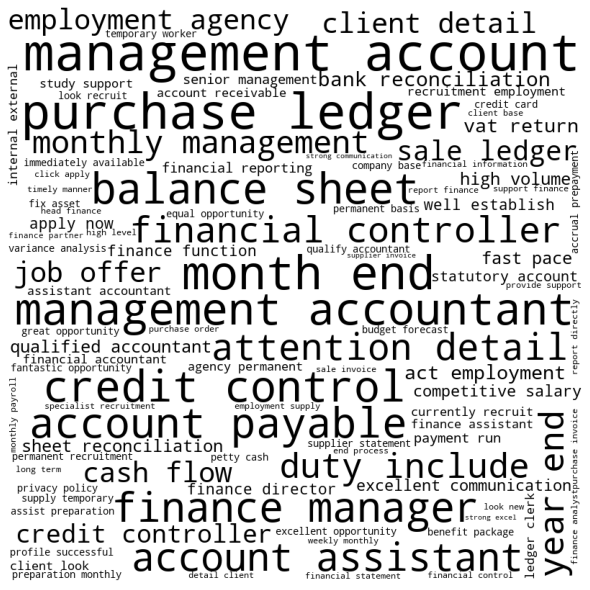

In [24]:
generate_cloud(7)

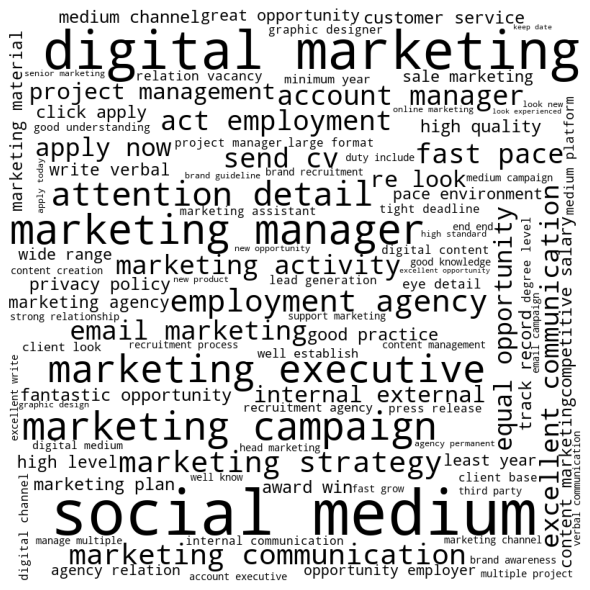

In [25]:
generate_cloud(8)

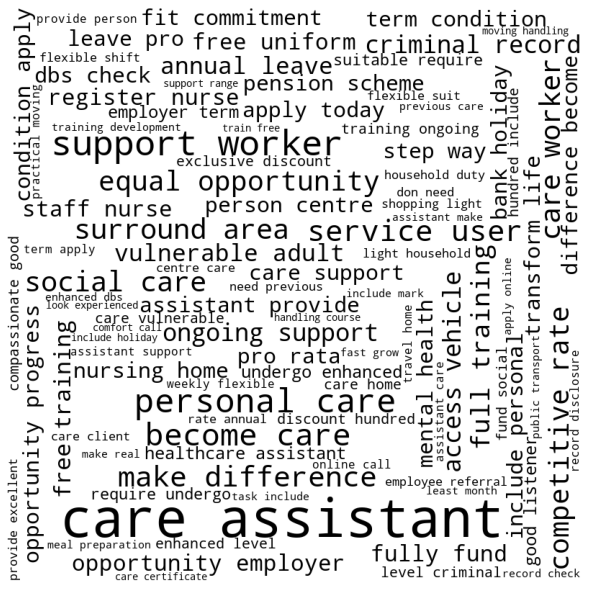

In [26]:
generate_cloud(9)

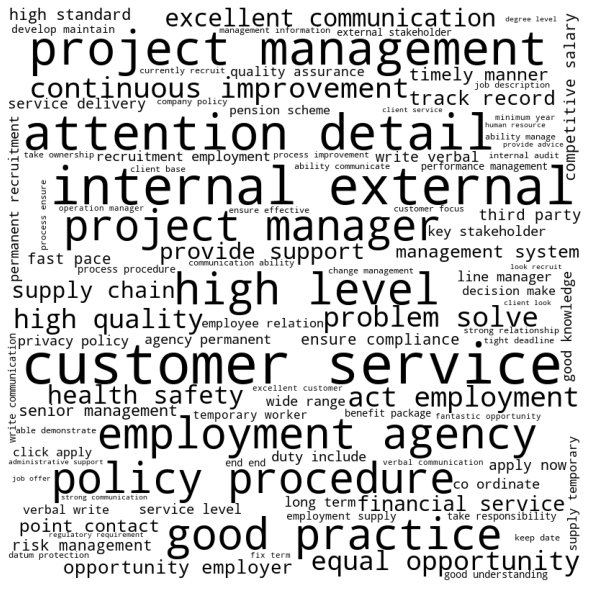

In [27]:
generate_cloud(10)

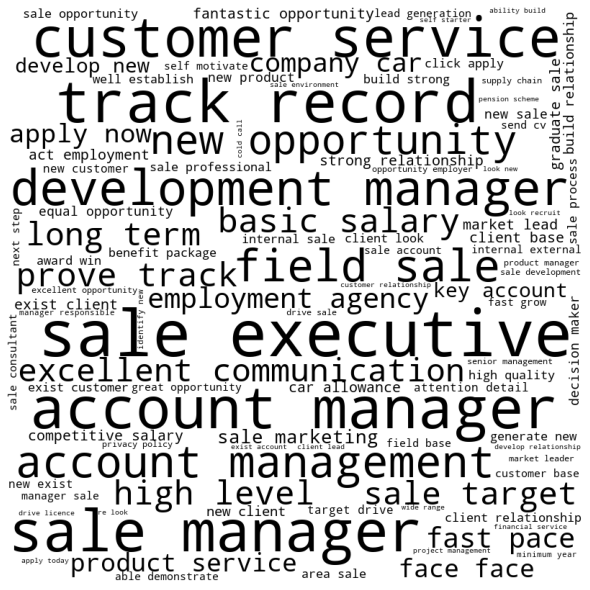

In [28]:
generate_cloud(11)

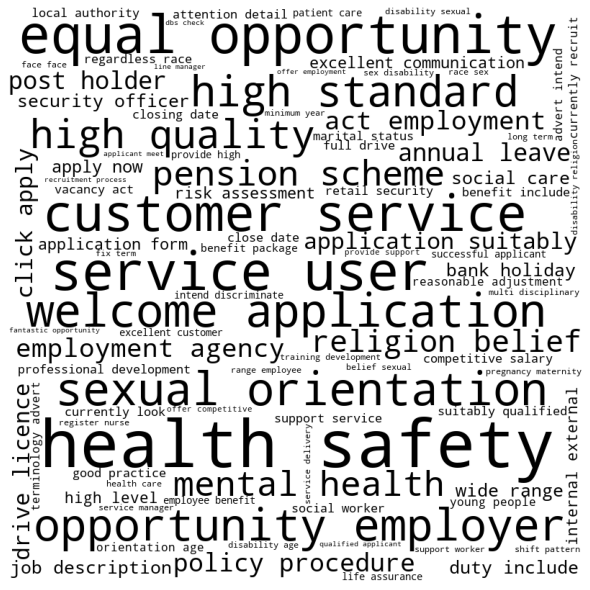

In [29]:
generate_cloud(12)

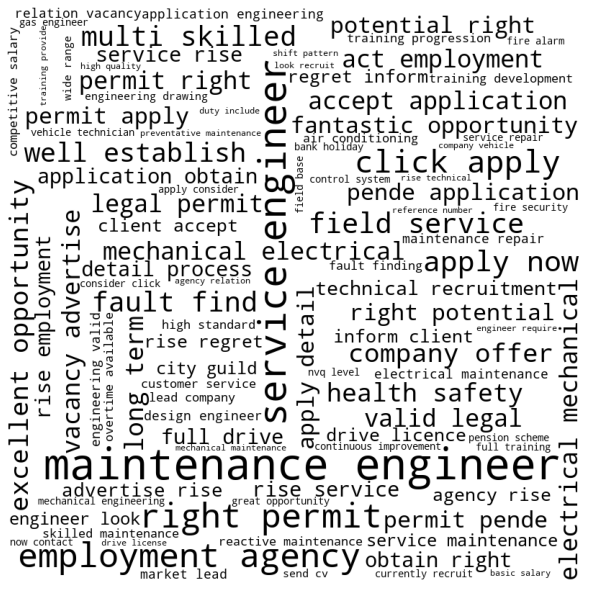

In [30]:
generate_cloud(13)

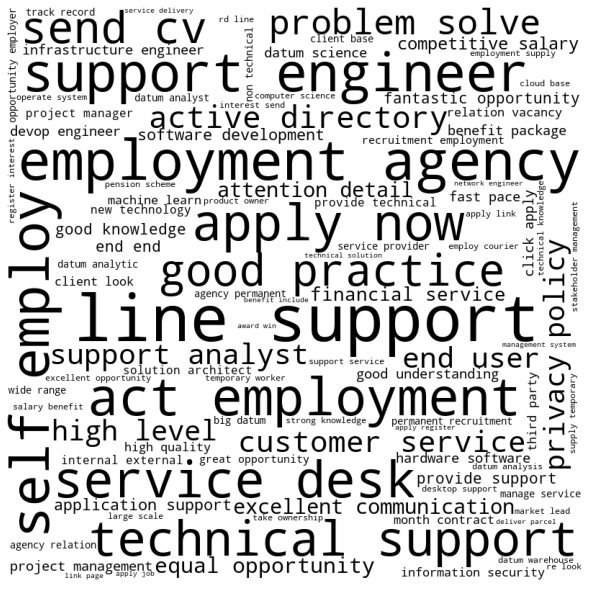

In [31]:
generate_cloud(14)

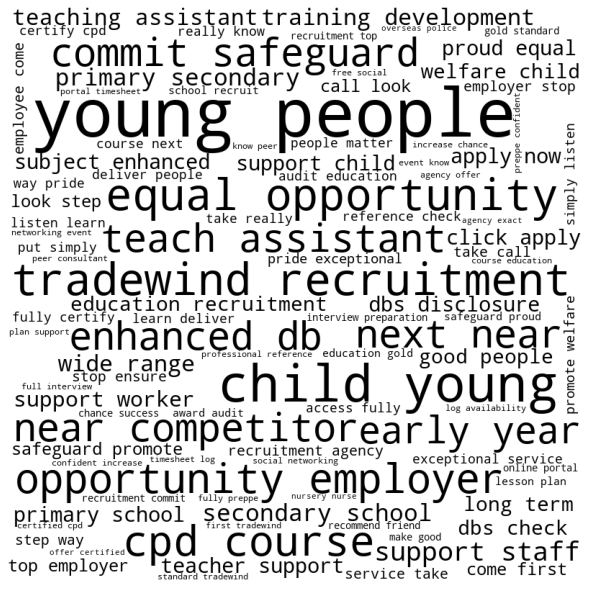

In [32]:
generate_cloud(15)

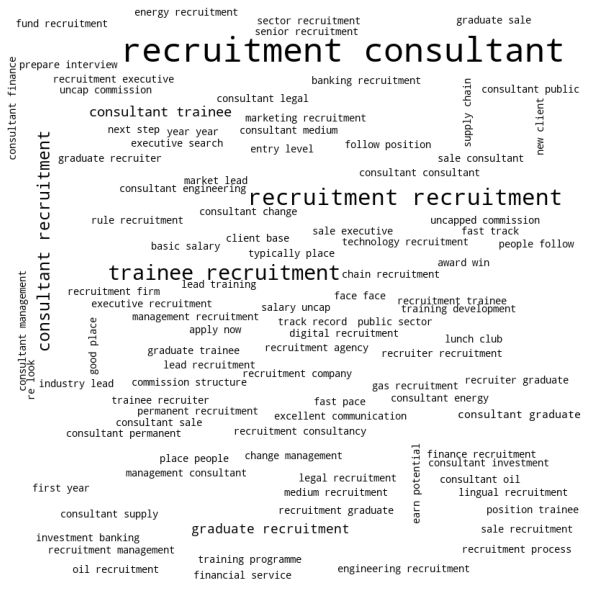

In [33]:
generate_cloud(16)

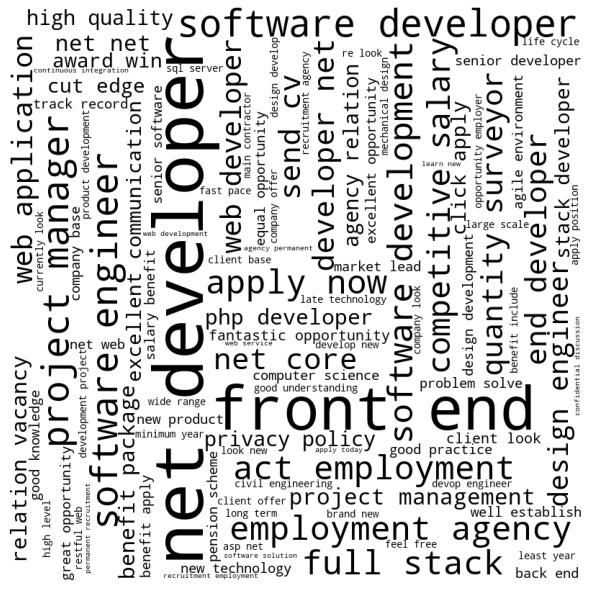

In [34]:
generate_cloud(17)

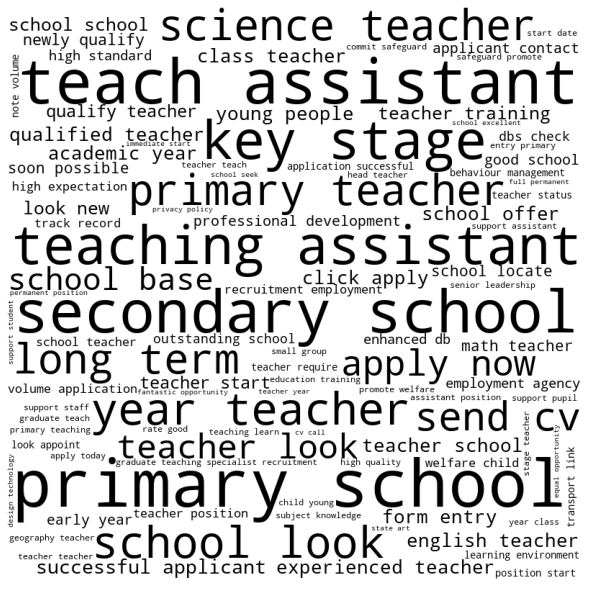

In [35]:
generate_cloud(18)

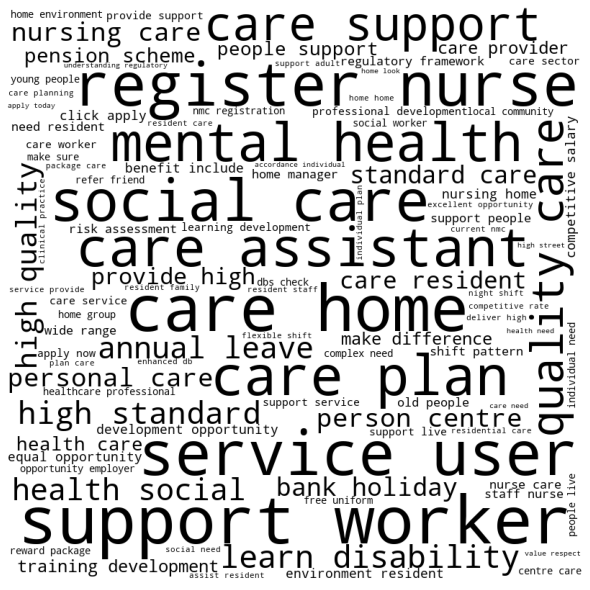

In [36]:
generate_cloud(19)